In [1]:
from qiskit import *
# Warning: you need to have utils.py in the notebook working directory
# You can se it with !pwd and change it with !cd (or using os module)
%run utils.py
from qiskit.visualization import plot_histogram

In [2]:
# The two important part of the oracle
# w: the number to gess in binary (folowing: f(x) = 1 iif x = w where f the oracle function)
w = 123
# The input number
N = len(bit_array(w))

In [3]:
# Creation of the circuit parts
entry = QuantumCircuit(N)
entry.x(range(N))
entry.y(range(N))
oracle = num_oracle(w)
diffuser = build_diffuser(N)

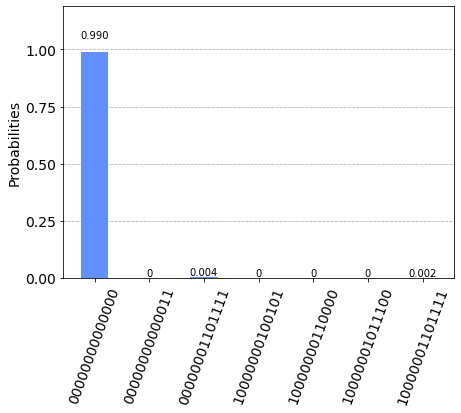

In [4]:
# Greation of the groover iterator
grover = QuantumCircuit(2 * N)
grover = grover.compose(entry, range(N))
for i in range(2 ** (N // 2)):
    grover = grover.compose(oracle, front=False)
    grover = grover.compose(diffuser, front=False)
grover.measure_all()
counts = simulate(grover)
plot_histogram(counts)